<a href="https://colab.research.google.com/github/TabithaWKariuki/Mental-Health-Project/blob/main/Mental_health_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health Project with NLP**

Team members: 

* Tabitha Kariuki 
* Samwel Omondi 
* Margaret Gathoni
* Christopher Kimani 


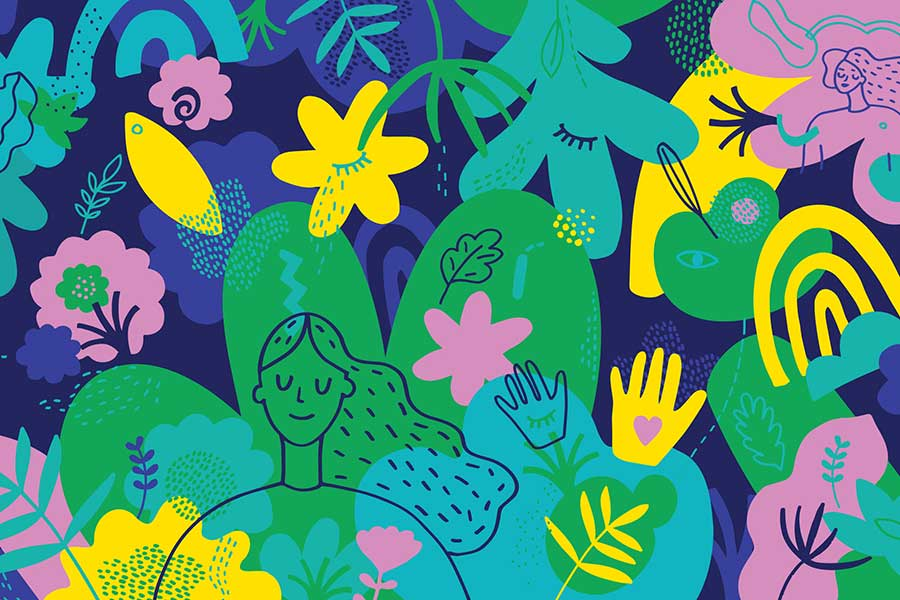
# **Introduction**

Mental health includes our emotional, psychological, and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make healthy choices.1 Mental health is important at every stage of life, from childhood and adolescence through adulthood.

Although the terms are often used interchangeably, poor mental health and mental illness are not the same. A person can experience poor mental health and not be diagnosed with a mental illness. Likewise, a person diagnosed with a mental illness can experience periods of physical, mental, and social well-being.

Around 1 in 4 people will experience a mental health problem this year. Low-income countries have an estimated treatment gap of 85% (as compared with high-income countries with a gap of 35% to 50%). While Kenya has a mental illness prevalence rate that is comparable to that of high-income countries, there are still less than 500 healthcare professionals serving the country.

In Kenya, there are growing concerns about mental health among young people, particularly university students that face a challenging and unique conflation of stressors that put them at risk of challenges like depression and substance abuse.

From the use of app-based solutions for screening to electronically delivered therapies, the use of technologies including machine learning and AI will potentially transform the delivery of mental health services in the coming years.

## **Problem Statement**
The aim of the project is to develop a machine learning model that classifies statements and questions expressed by university students in Kenya when speaking about the mental health challenges they struggle with. The four categories are depression, suicide, alchoholism, and drug abuse.

## **Objective**
The aim is to come up with a solution that will be used for a prototype of a mental health chatbot designed specifically for university students. 

## **Data Understanding**

In [ ]:
#Importing important libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
import matplotlib as plty
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using matplotlib backend: agg


In [ ]:
#Loading the train dataset
train = pd.read_csv('Train.csv')

In [ ]:
#features inthe dataset
train.shape

(616, 3)

we have 616 rows and 3 columns

In [ ]:
#first five rows
train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [ ]:
#Last five rows
train.tail()

,ID,text,label
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression
615,ORF71PVQ,I feel so discouraged with life,Depression


In [ ]:
#Load the test dataset
test = pd.read_csv('Test.csv')

In [ ]:
#Features inthe test data 
test.shape

(309, 2)

In [ ]:
#First five rows
test.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


In [ ]:
#Last five rows
test.tail()

,ID,text
304,Z9A6ACLK,Yes
305,ZDUOIGKN,My girlfriend dumped me
306,ZHQ60CCH,How can I go back to being my old self?
307,ZVIJMA4O,Is it true bhang is medicinal?
308,ZYIFAY98,how can I overcome the problem?


We can see the test dataset doesn't have the label  column which is it will be used to tesst if our model can correctly label the dataset 

## **Data Cleaning and Data Preparation**

1. train dataset

In [ ]:
#Check for null values
train.isnull().sum().sum()

0

In [ ]:
#check for duplicates
train.duplicated().sum()

0

We have no null values or duplicates in our data set.
So will move forward to word processing

# **Exploratory Data Analysis**

In [ ]:
#Checking our label column value count
train['label'].value_counts()

Depression    352
Alcohol       140
Suicide        66
Drugs          58
Name: label, dtype: int64

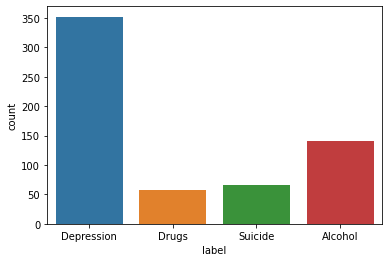

In [ ]:
#Visualize this
sns.countplot(train['label'], label = "Count") 

We have four classes and also a case of class imbalance, which will be a bit trick since we trying to predict the test text to be in either of these categories

In [ ]:
# Let's get the length of the messages

train['length'] = train['text'].apply(len)
train.head()

,ID,text,label,length
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,39
1,9JDAGUV3,Why do I get hallucinations?,Drugs,28
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,57
3,6UY7DX6Q,Why is life important?,Suicide,22
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,51


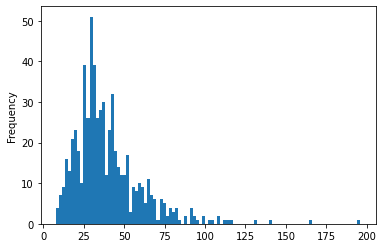

In [ ]:
#Visualizing this
train['length'].plot(bins=100, kind='hist') 

We can see that the longest text lie between 25 to 50 characters with a peek aroung 39

In [ ]:
#Summary statistics of our text
train.length.describe()

count    616.000000
mean      39.813312
std       21.438797
min        8.000000
25%       26.000000
50%       35.000000
75%       48.250000
max      196.000000
Name: length, dtype: float64

The Longest sentence has a length of 196 characters, the minimum has 8 characters but overall our text mean lie around 39 characters.

In [ ]:
# Let's see the longest message 
train[train['length'] == 196]['text'].iloc[0]

'I am financially constrained over school fees and my  family background is not stable with a lot of debts…I have an elderly brother who could easily support me but has no job even after graduating'

In [ ]:
# Let's see the shortest message 
train[train['length'] == 8]['text'].iloc[0]

'I am sad'

In [ ]:
# Let's see the message with mean length 
train[train['length'] == 39]['text'].iloc[0]

'I feel that it was better I dieAm happy'

In [ ]:
#Lets see text from depression category
Depression_texts = train[train['label']=='Depression']
Depression_texts

,ID,text,label,length
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,39
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,57
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,51
5,V6VSDJ5I,What are the effects of depression to ones health,Depression,49
6,9736J4UE,Why is everything so hard to deal with in this...,Depression,51
...,...,...,...,...
603,S6WK4NBL,"I feel confused, how can I overcome the problem?",Depression,49
608,LGAPCAYO,I feel very low and at times,Depression,30
610,69V3L12G,Life is just hard,Depression,17
614,1DS3P1XO,I feel unworthy,Depression,16


We have around 352 rows of text classified in the Depression category

In [ ]:
#Puting the sentence in a list
sentences = Depression_texts['text'].tolist()
len(sentences)

352

In [ ]:
print(sentences)

['I feel that it was better I dieAm happy', 'I am stresseed due to lack of financial support in school', 'How could I be helped to go through the depression?', 'What are the effects of depression to ones health', 'Why is everything so hard to deal with in this life', ' I feel emotionally overwhelmed ', 'How to survive without money?', 'I was ever sad,alone and always on drugsNow I know how to cope with negative aspects in my life', 'I feel empty,absent minded', 'I experienced depression in my studies', 'I feel like am alone in this world', 'I feel low and out of place', 'What should i do to get out of depression?', 'I feel hopeless, unworthy and useless …How do I cope with stress and frorge the past?', 'I feel bad because life difficulties, I also feel bad that I have no one to control', 'Sadness,hatredNow feeling is happiness', 'Feelings then were like everything was falling apart,Now things are in control', 'how do I cope with ta difficult situation?what will I d to avoid it?', 'Dete

In [ ]:
#Joining the sentences to form one string
sentences_as_one_string =" ".join(sentences)

In [ ]:
sentences_as_one_string

"I feel that it was better I dieAm happy I am stresseed due to lack of financial support in school How could I be helped to go through the depression? What are the effects of depression to ones health Why is everything so hard to deal with in this life  I feel emotionally overwhelmed  How to survive without money? I was ever sad,alone and always on drugsNow I know how to cope with negative aspects in my life I feel empty,absent minded I experienced depression in my studies I feel like am alone in this world I feel low and out of place What should i do to get out of depression? I feel hopeless, unworthy and useless …How do I cope with stress and frorge the past? I feel bad because life difficulties, I also feel bad that I have no one to control Sadness,hatredNow feeling is happiness Feelings then were like everything was falling apart,Now things are in control how do I cope with ta difficult situation?what will I d to avoid it? Deteriorating academic performance I feel rejected  Is it r

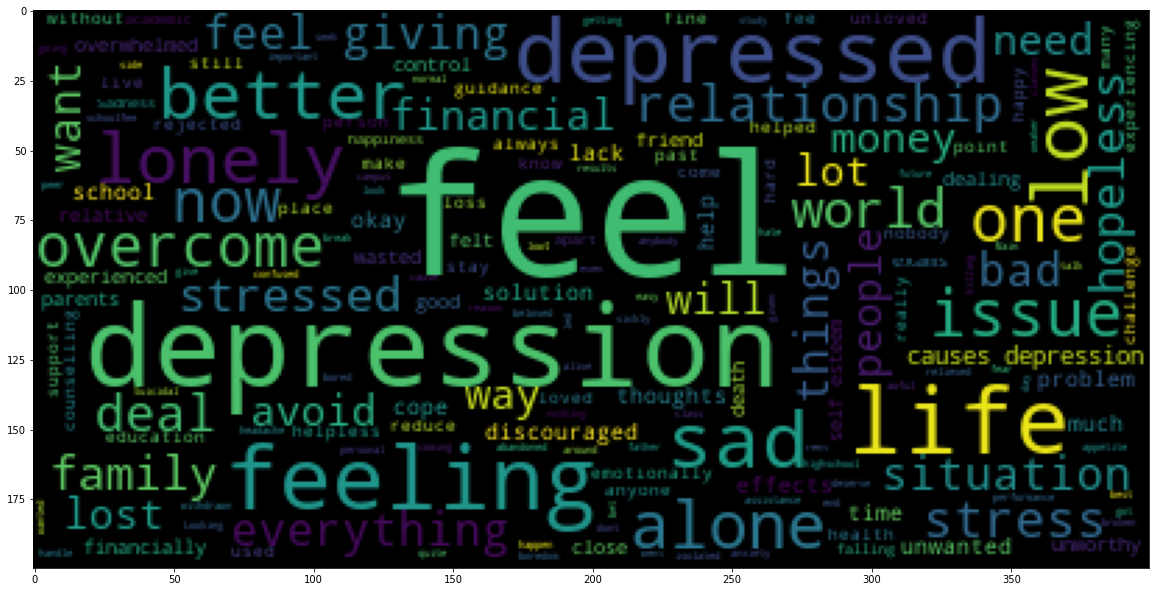

In [ ]:
#Previewing in a word cloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

From the depression category we see the bolder the word the more import/frequent it is to help in this classification. Some of the most frequent words are:
* Depression
* Feel
* Sad
* Depressed
* Lonely
* Hopelessness

These are some of the word in mental health education we normally look out for in diagnosis aand in initiation of offering help or therapy

In [ ]:
#Lets see text from Alcohol category
Alcohol_texts = train[train['label']=='Alcohol']
Alcohol_texts

,ID,text,label,length
8,OSFJV5EC,How to manage taking alcohol?,Alcohol,29
11,LM8GPR0X,How do i stop this? What do I do when life bec...,Alcohol,62
18,WQG9NYO0,How can I stop using alcohol?,Alcohol,29
27,46DPSGSJ,Effect of alcohol both in the society and my body,Alcohol,49
30,NUJNN8HA,How will I stop? What addiction means.,Alcohol,38
...,...,...,...,...
588,1SYJ01MY,What are the effects of taking alcohol?,Alcohol,39
599,C2GBAI5D,How to stop alcohol intake,Alcohol,26
606,0OSLJ1HL,Where can i get money to be drinking daily?,Alcohol,43
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol,36


In [ ]:
#Putting the sentences to a list
sentences1 = Alcohol_texts['text'].tolist()
len(sentences1)

140

In [ ]:
print(sentences1)

['How to manage taking alcohol?', 'How do i stop this? What do I do when life becomes unbearable?', 'How can I stop using alcohol?', 'Effect of alcohol both in the society and my body', 'How will I stop? What addiction means.', 'I just stopped taking alcohol because i thought it was not good for me', 'How do I seek help from alcoholism', 'What are the effects of alcohol?', 'How can I stop alcohol', 'what are the best ways I can follow to stop using it', 'I think I can handle my drink', 'How can i stop taking alcohol', 'what can I do to minimize my alcoholism', 'Effects of alcohol?', 'How to avoid alcohol', 'is there harm fo me when I take alcohol', 'What is the  importance of alcohol?', 'Effects of alcohol on my body health', 'How can I overcome alcoholism? ', 'How to stop alcohol', 'should I stop drinking alcohol', 'What is a good of life?', 'how do I  avoid getting addicted', 'Why do we drink anyway? What is the effect of overdrinking alcohol?', 'How to overcome this peer pressure of

In [ ]:
#Joining the sentences to one string
sentences1_as_one_string =" ".join(sentences1)

In [ ]:
sentences1_as_one_string

'How to manage taking alcohol? How do i stop this? What do I do when life becomes unbearable? How can I stop using alcohol? Effect of alcohol both in the society and my body How will I stop? What addiction means. I just stopped taking alcohol because i thought it was not good for me How do I seek help from alcoholism What are the effects of alcohol? How can I stop alcohol what are the best ways I can follow to stop using it I think I can handle my drink How can i stop taking alcohol what can I do to minimize my alcoholism Effects of alcohol? How to avoid alcohol is there harm fo me when I take alcohol What is the  importance of alcohol? Effects of alcohol on my body health How can I overcome alcoholism?  How to stop alcohol should I stop drinking alcohol What is a good of life? how do I  avoid getting addicted Why do we drink anyway? What is the effect of overdrinking alcohol? How to overcome this peer pressure of taking alcohol? what can I do inorder to stop alcohol abuse How to manag

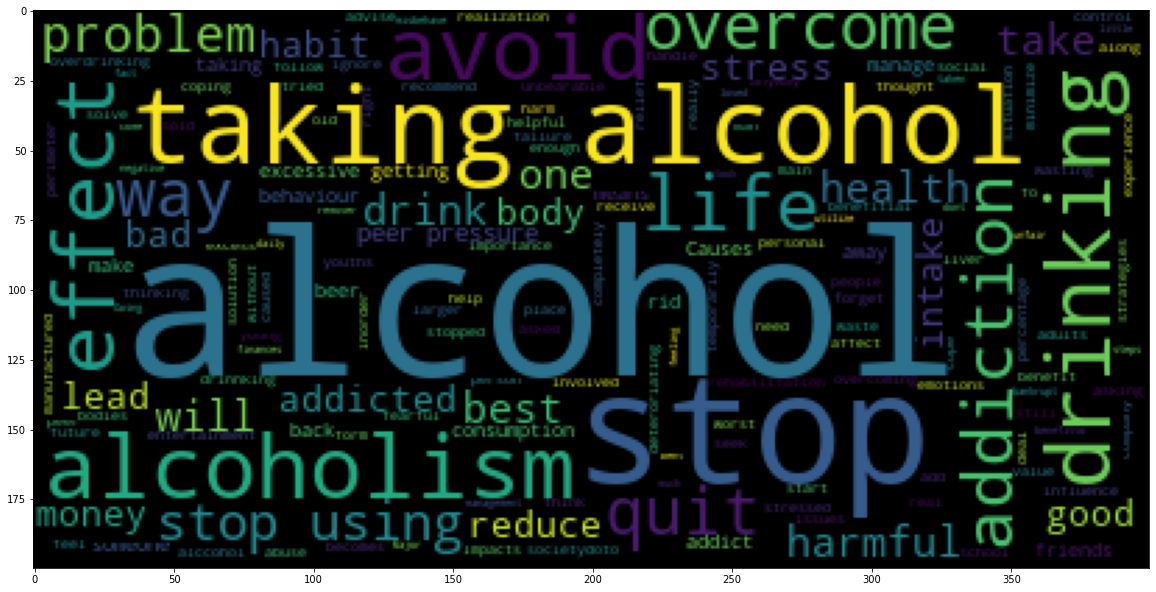

In [ ]:
#Previewing our stringin a word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences1_as_one_string))

We can some of the most frequent word in Alcohol class are:
* Alcohol
* Alcoholism
* Avoid
* Stop
* Drinking
* Taking alcohol
* Stop using
* Addiction

Since we are in Alcohol class we see the word "Alcohol" is the boldest which is one of the ways used to making the classification. We can also see most of the word are those associated with using and also in when on recovery journey or in preparation.

In [ ]:
#Lets see text from Suicide category
Suicide_texts = train[train['label']=='Suicide']
Suicide_texts

,ID,text,label,length
3,6UY7DX6Q,Why is life important?,Suicide,22
40,ZBUCI1MA,Causes of suicide by youths,Suicide,27
57,0RFTD03Y,How to deal and overcome bad situation,Suicide,38
61,BM946H9J,Will Prayer help me out of sucidal thoughts.,Suicide,44
76,SCTJPCQ1,Is there self worth in life?,Suicide,28
...,...,...,...,...
601,139DFUFL,Is suicide the best remedy?,Suicide,27
602,6SZ3EXJ3,I did not ask for any assistance at first but ...,Suicide,108
605,MYHIEXZJ,I was just tired,Suicide,16
609,KFPOMS0P,Why am I alive?,Suicide,15


In [ ]:
#Putting the text into a list
sentences2 = Suicide_texts['text'].tolist()
len(sentences2)

66

In [ ]:
print(sentences2)

['Why is life important?', 'Causes of suicide by youths', 'How to deal and overcome bad situation', 'Will Prayer help me out of sucidal thoughts.', 'Is there self worth in life?', 'How to overcome such an incident', 'Measures to take to overcome suicidal thoughts', 'Why is life so difficult?', 'I am overwhelmed by life.', 'Is withdrawal from people helpful from commiting suicide?', 'Causes of suicide', 'How to avoid the thoughts?', 'Why do people think of commiting suicide?', 'Why do I suffer?', 'How can I overcome suicide from heartbreak?', 'is life even worth it', 'How to manage my relationship', 'Never sought assistance', 'why some things happen over and over again', 'I did not seek help', 'If the person i wronged will forgive me and accept reconcilliation', 'why do I always feel heartbroken all the time', ' how I can be able to handle my stress and not feel like taking away my life', 'Why I needed to keep holding on to nothing. If my life really ahd a purpose', 'How to convince som

In [ ]:
#Joining the sentence into a string
sentences2_as_one_string =" ".join(sentences2)

In [ ]:
sentences2_as_one_string

'Why is life important? Causes of suicide by youths How to deal and overcome bad situation Will Prayer help me out of sucidal thoughts. Is there self worth in life? How to overcome such an incident Measures to take to overcome suicidal thoughts Why is life so difficult? I am overwhelmed by life. Is withdrawal from people helpful from commiting suicide? Causes of suicide How to avoid the thoughts? Why do people think of commiting suicide? Why do I suffer? How can I overcome suicide from heartbreak? is life even worth it How to manage my relationship Never sought assistance why some things happen over and over again I did not seek help If the person i wronged will forgive me and accept reconcilliation why do I always feel heartbroken all the time  how I can be able to handle my stress and not feel like taking away my life Why I needed to keep holding on to nothing. If my life really ahd a purpose How to convince someone against commiting suicide How to deal with the problems which can le

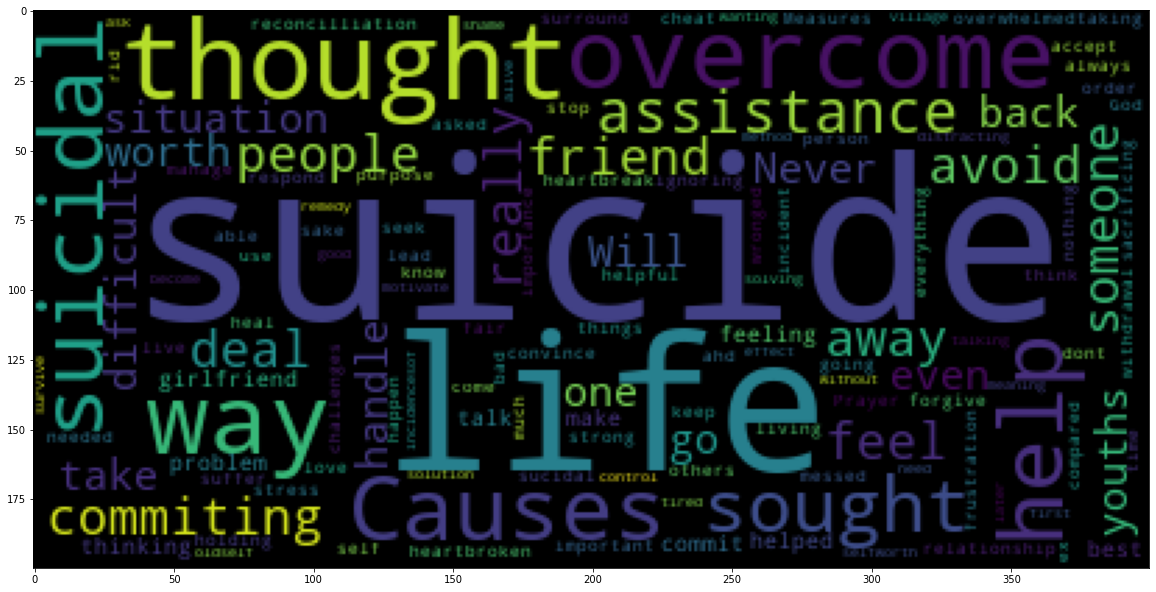

In [ ]:
#Previewing the string in word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences2_as_one_string))

Most of the frequent words in our suicide clas are:
* Suicide
* Suicidal
* Life
* Thought
* Overcome
* commiting
* Sought/Assistance
* Causes

Suicide is death caused by injuring oneself with the intent to die. Some of these frequent words are to be watched out from in a chatbox. There could many factors leading to the act itself but most importantly they are all form of mental health and if action is not taken could lead to detrimental actions that could lead to loss of life

In [ ]:
#Lets see text from drug category
Drugs_texts = train[train['label']=='Drugs']
Drugs_texts

,ID,text,label,length
1,9JDAGUV3,Why do I get hallucinations?,Drugs,28
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs,38
20,H6HGNIPM,Does mediataton help stop weed addiction?,Drugs,41
22,SI6LH9S9,What are the effects of smoking bhang?,Drugs,38
28,AWTMRJ2C,How could i stop using bhang,Drugs,28
29,Z38CHPES,How to avoid drug abuse?,Drugs,24
38,93G4A70N,How does one avoid bad company?,Drugs,32
74,NGK6ZM5H,I have a bad company of friends that influence...,Drugs,63
79,MKWX9595,How can i stop using weed,Drugs,25
86,VPIOXWS8,What is the best way to withdraw from drugs?,Drugs,44


In [ ]:
#Putting the text into a list
sentences3 = Drugs_texts['text'].tolist()
len(sentences3)

58

In [ ]:
print(sentences3)

['Why do I get hallucinations?', 'Is heaven open for us who smoke bhang?', 'Does mediataton help stop weed addiction?', 'What are the effects of smoking bhang?', 'How could i stop using bhang', 'How to avoid drug abuse?', 'How  does one avoid bad company?', 'I have a bad company of friends that influence me to smoke weed', 'How can i stop using weed', 'What is the best way to withdraw from drugs?', ' why do we use bhang?', 'How can i stop drug abuse?', 'what are the advantages of taking bhang?', "I can't stop smoking weed because of the good feeling of calmness.", 'Is taking drugs worth it?', 'How can I stop taking bhang?', 'How can I stop drug usage?', 'Does bhang affect your memory?', 'How to stop bhang?', 'What is more to life?', 'what do I do to stop?', 'What are the effects of smoking bhang?', 'What are the effects of drug consumption?', 'What will my mum think of me whren she finds out that I smoke weed?', 'Does smoking make one cool?', 'How to deal with hallucinations?', 'What c

In [ ]:
#Joining the sentences into a string
sentences3_as_one_string =" ".join(sentences3)

In [ ]:
sentences3_as_one_string

"Why do I get hallucinations? Is heaven open for us who smoke bhang? Does mediataton help stop weed addiction? What are the effects of smoking bhang? How could i stop using bhang How to avoid drug abuse? How  does one avoid bad company? I have a bad company of friends that influence me to smoke weed How can i stop using weed What is the best way to withdraw from drugs?  why do we use bhang? How can i stop drug abuse? what are the advantages of taking bhang? I can't stop smoking weed because of the good feeling of calmness. Is taking drugs worth it? How can I stop taking bhang? How can I stop drug usage? Does bhang affect your memory? How to stop bhang? What is more to life? what do I do to stop? What are the effects of smoking bhang? What are the effects of drug consumption? What will my mum think of me whren she finds out that I smoke weed? Does smoking make one cool? How to deal with hallucinations? What could i do to deal with frustrations? Does weed do any  good? How to stop? I hav

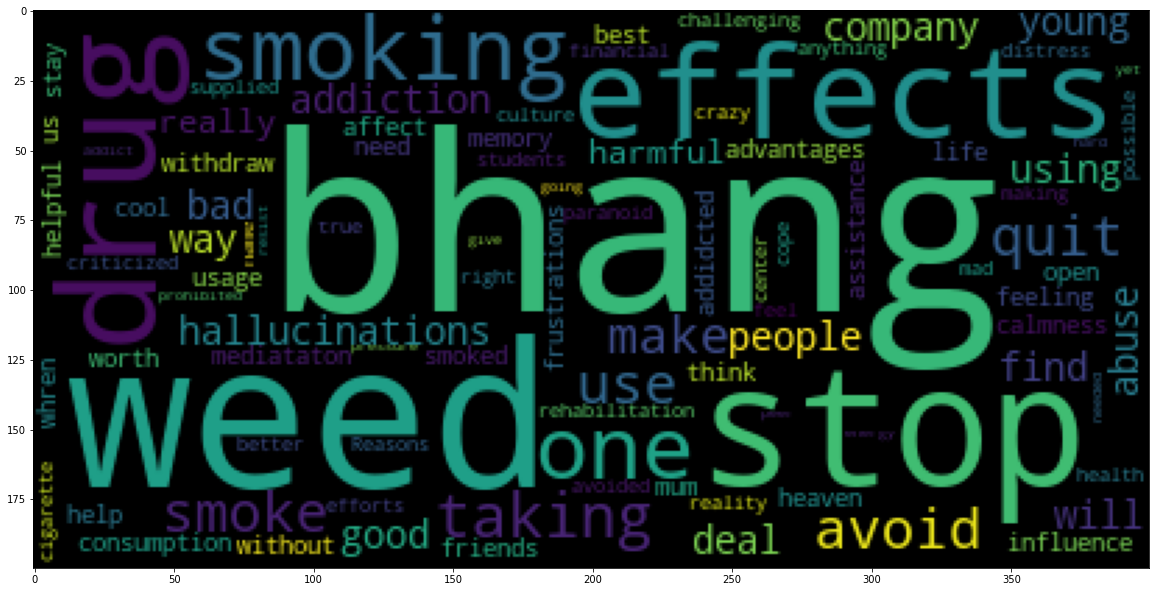

In [ ]:
#Visualizing the string in a word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences3_as_one_string))

The most frequent words in our drug class are:
* Drug
* Bhang
* Weed
* Addiction
* Smoking
* Hallucinations
* Stop


we can see most of these word are either the drugs themselves (Weed, Bhang), the form of consumption (smoking), the effect they give (Hallucination) or a step towrds recovery (Stop)


In [ ]:
#Droping unnecessary columns
train_clean = train.drop(['ID', 'length'], axis=1)
train_clean.head()

,text,label
0,I feel that it was better I dieAm happy,Depression
1,Why do I get hallucinations?,Drugs
2,I am stresseed due to lack of financial suppor...,Depression
3,Why is life important?,Suicide
4,How could I be helped to go through the depres...,Depression


# **Lets just take a look at our test dataset word cloud too**

In [ ]:
#Reminder of our data
test.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


We don't have a label column

In [ ]:
#we don't need the ID columns
test_clean = test.drop(['ID'], axis=1)

In [ ]:
#Lets see text from drug category
test_texts = test_clean['text']
test_texts

0              How to overcome bad feelings and emotions
1                         I feel like giving up in life 
2      I was so depressed feel like got no strength t...
3      I feel so low especially since I had no one to...
4           can i be successful when I am a drug addict?
                             ...                        
304                                                  Yes
305                              My girlfriend dumped me
306              How can I go back to being my old self?
307                      Is it true bhang is  medicinal?
308                      how can I overcome the problem?
Name: text, Length: 309, dtype: object

In [ ]:
#Putting the sentences in a list
test_sentences = test_texts.tolist()
len(test_sentences)

309

In [ ]:
print(test_sentences)

['How to overcome bad feelings and emotions', 'I feel like giving up in life ', 'I was so depressed feel like got no strength to continue', 'I feel so low especially since I had no one to talk to', ' can i be successful when I am a drug addict?', 'I am dissapointed,I need a sense of closure', 'I lost hope', 'I feel unloved and uncared for', 'What are factors that leads to addiction of alcohol', 'Is the advice of drinking moderatly ,prudent?', 'How to limit myself from getting regular depression', 'I needed to know whether the alcohol releases stress', ' I was sad and did not want to go out', 'Am I that ugly', 'How should I avoid alcohol intake? what are the advantages of alcohol intake?', 'I was pale and lost appetite', 'I am going through loss of a loved one…I am going through a breakup', 'What are the effects of bhang?', 'Depressed due to the loss of a relative', 'Why me?, why so?, why now?', ' feeling sad and lonely Now feeling contentment and ability to withstand depression', 'Can 

In [ ]:
#Joining the sentences to one string
test_sentences_as_one_string =" ".join(test_sentences)

In [ ]:
test_sentences_as_one_string

"How to overcome bad feelings and emotions I feel like giving up in life  I was so depressed feel like got no strength to continue I feel so low especially since I had no one to talk to  can i be successful when I am a drug addict? I am dissapointed,I need a sense of closure I lost hope I feel unloved and uncared for What are factors that leads to addiction of alcohol Is the advice of drinking moderatly ,prudent? How to limit myself from getting regular depression I needed to know whether the alcohol releases stress  I was sad and did not want to go out Am I that ugly How should I avoid alcohol intake? what are the advantages of alcohol intake? I was pale and lost appetite I am going through loss of a loved one…I am going through a breakup What are the effects of bhang? Depressed due to the loss of a relative Why me?, why so?, why now?  feeling sad and lonely Now feeling contentment and ability to withstand depression Can I overcome depression? How would I quite alcoholism Downplayed,s

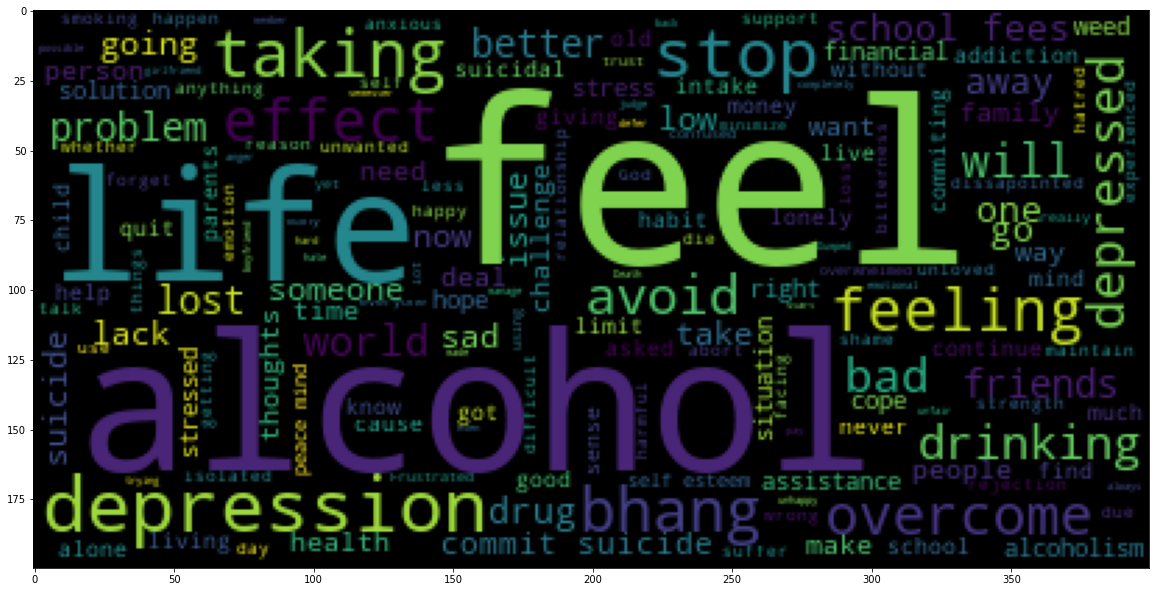

In [ ]:
# Visualizing the test string
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(test_sentences_as_one_string))

Some of the most frequent words in our test set are:
* Alcohol
* Avoid
* feeling
* Depression
* Bhang
* Drinking
* Life
* Suicide

We can see that most of the frequent words here are also the frequant words in the train data set classes . This show our test data repressent all our classes and so our model should be able to classify these text correctly to their respective category to make it an effective model to achieve our objective

# **Modeling**

**1. Pre-processing training set**

In [ ]:
# Pre-processing
#  Converting the labels from strings to binary values for our classifier
train_clean['label'] = train_clean.label.map({'Depression': 0, 'Alcohol': 1,
                                  'Suicide': 2, 'Drugs': 3})
train_clean.head()

,text,label
0,I feel that it was better I dieAm happy,0
1,Why do I get hallucinations?,3
2,I am stresseed due to lack of financial suppor...,0
3,Why is life important?,2
4,How could I be helped to go through the depres...,0


In [ ]:
# Converting all characters in the text to lower case:
train_clean['text'] = train_clean.text.map(lambda x: x.lower())

# Removing any punctuation:
train_clean['text'] = train_clean.text.str.replace('[^\w\s]', '')

# Tokenizing the messages into into single words using nltk. 
nltk.download("popular")
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
  
tokenizer = RegexpTokenizer("[\w']+")
# convert the column to string
train_clean['text'] = train_clean['text'].astype(str)

# apply the `word_tokenize()` function
train_clean['text'] = train_clean['text'].apply(word_tokenize)

# We then perform some word stemming. 
# The idea of stemming is to normalize our text for all variations of words carry the same meaning, 
# regardless of the tense. One of the most popular stemming algorithms is the Porter Stemmer:
# 
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
train_clean['text'] = train_clean['text'].apply(lambda x: [stemmer.stem(y) for y in x])

# We will transform the data into occurrences, 
# which will be the features that we will feed into our model:
#
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
train_clean['text'] = train_clean['text'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(train_clean['text'])

# Ensuring we have a simple word-count per message, 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

train_clean.head()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

,text,label
0,i feel that it wa better i dieam happi,0
1,whi do i get hallucin,3
2,i am stresse due to lack of financi support in...,0
3,whi is life import,2
4,how could i be help to go through the depress,0


 **1.1 Pre-processing test set**

In [ ]:
#Will follow almost all the step we did earier

# Converting all characters in the text to lower case:
test_clean['text'] = test_clean.text.map(lambda x: x.lower())


# Removing any punctuation:
test_clean['text'] = test_clean.text.str.replace('[^\w\s]', '')


# tokenizing the messages into into single words using nltk. 
tokenizer = RegexpTokenizer("[\w']+")
# convert the column to string
test_clean['text'] = test_clean['text'].astype(str)

# apply the `word_tokenize()` function
test_clean['text'] = test_clean['text'].apply(word_tokenize)
test_clean.head()

# We then perform some word stemming. 
stemmer = PorterStemmer()

test_clean['text'] = test_clean['text'].apply(lambda x: [stemmer.stem(y) for y in x])

# We will transform the data into occurrences, 
test_clean['text'] = test_clean['text'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts_test = count_vect.fit_transform(test_clean['text'])

# Ensuring we have a simple word-count per message, 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts_test)

counts_tst = transformer.transform(counts_test)

test_clean.head()

,text
0,how to overcom bad feel and emot
1,i feel like give up in life
2,i wa so depress feel like got no strength to c...
3,i feel so low especi sinc i had no one to talk to
4,can i be success when i am a drug addict


# **2. Training our model**

Just a reminder we are using two different set of data one (train) is just for training our model and the test will be used for our model evaluation

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
# Separate out the text and labels into training predictor and target

training_sentences = train_clean['text']
testing_sentences = test_clean['text']
training_labels = train_clean['label']

In [ ]:
#Building our RNN model
#creating a Keras layer that uses a TensorFlow Hub model to embed the sentences
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(training_sentences)

<tf.Tensor: shape=(616, 50), dtype=float32, numpy=
array([[ 0.3105655 , -0.13782199, -0.1651549 , ..., -0.08926853,
        -0.11925873,  0.21788935],
       [ 0.19419056, -0.3049712 , -0.12007315, ...,  0.07490648,
         0.14665318,  0.319315  ],
       [ 0.053682  , -0.10152911,  0.06173692, ..., -0.09806557,
         0.04747248,  0.13206805],
       ...,
       [ 0.26310948,  0.01320497, -0.20228262, ..., -0.15969718,
         0.11998497,  0.16574454],
       [ 0.21783654,  0.13815744, -0.16360326, ...,  0.1277985 ,
        -0.07712787, -0.09480156],
       [ 0.02179668, -0.22464761,  0.0252818 , ...,  0.05934089,
        -0.05534336,  0.01387291]], dtype=float32)>

In [ ]:
#building the full model:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Creating Loss function and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Actual Training of the model
history = model.fit(training_sentences, training_labels,
                    batch_size=128, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
4/4 [==============================] - 8s 1s/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0.0000e+00 - val_accuracy: 0.5161
Epoch 2/10
4/4 [==============================] - 3s 822ms/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0.0000e+00 - val_accuracy: 0.5161
Epoch 3/10
4/4 [==============================] - 3s 850ms/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0.0000e+00 - val_accuracy: 0.5161
Epoch 4/10
4/4 [==============================] - 3s 768ms/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0.0000e+00 - val_accuracy: 0.5161
Epoch 5/10
4/4 [==============================] - 3s 607ms/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0.0000e+00 - val_accuracy: 0.5161
Epoch 6/10
4/4 [==============================] - 2s 558ms/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0.0000e+00 - val_accuracy: 0.5161
Epoch 7/10
4/4 [==============================] - 2s 559ms/step - loss: 0.0000e+00 - accuracy: 0.5854 - val_loss: 0

In [ ]:
#Evaluating the model
results = model.predict(testing_sentences)
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: -1.386
accuracy: -1.909
